In [1]:
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import matplotlib.ticker as mtick  # type: ignore

from hoi.plot import plot_landscape  # type: ignore
from hoi.utils import get_nbest_mult  # type: ignore

# Import the O-information and dynamic O-information
from hoi.metrics import Oinfo, GradientOinfo  # type: ignore

warnings.filterwarnings("ignore")

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
input_generation_date = "2025-02-18"

video_2n = "2n_0m_2f_230330_1"
video_3n = "3n_0m_3f_230404_1"
video_4n = "23_05_23_3_1080"
x_bounds = [0, 1080]
y_bounds = [0, 1920]

## Load data

In [3]:
df_2n = pd.read_csv("{}/interpolated_{}.csv".format(input_path, video_2n), low_memory=False)
df_3n = pd.read_csv("{}/interpolated_{}.csv".format(input_path, video_3n), low_memory=False)
df_4n = pd.read_csv("{}/interpolated_{}.csv".format(input_path, video_4n), low_memory=False)

## Estimate distances between individuals

In [4]:
def estimate_distances(df):
    df_final = []
    print("Estimate distances for:", len(df["permuted_id"].unique()), "ids")
    for id_1 in sorted(df["permuted_id"].unique()):
        for id_2 in sorted(df["permuted_id"].unique()):
            if id_1 < id_2:
                print("-Pairs: {}{}".format(id_1, id_2))
                time = df[df["permuted_id"] == id_1]["time"].values
                x1 = df[df["permuted_id"] == id_1]["position_x"].values
                x2 = df[df["permuted_id"] == id_2]["position_x"].values
                y1 = df[df["permuted_id"] == id_1]["position_y"].values
                y2 = df[df["permuted_id"] == id_2]["position_y"].values
                distance = np.sqrt(np.power(x2 - x1, 2) + np.power(y2 - y1, 2))
                df_final.append(
                    pd.DataFrame({
                        "time": time,
                        "id_1": [id_1]*len(time),
                        "id_2": [id_2]*len(time),
                        "distance": distance
                    })
                )
    df_final = pd.concat(df_final, ignore_index=True)
    return df_final

In [5]:
df_distances_2n = estimate_distances(df=df_2n)
df_distances_3n = estimate_distances(df=df_3n)
df_distances_4n = estimate_distances(df=df_4n)

Estimate distances for: 2 ids
-Pairs: 01
Estimate distances for: 3 ids
-Pairs: 01
-Pairs: 02
-Pairs: 12
Estimate distances for: 4 ids
-Pairs: 01
-Pairs: 02
-Pairs: 03
-Pairs: 12
-Pairs: 13
-Pairs: 23


In [6]:
# Temporal step
df_distances_4n = df_distances_4n[df_distances_4n["time"] % 3 == 0]

## Plot distances between individuals

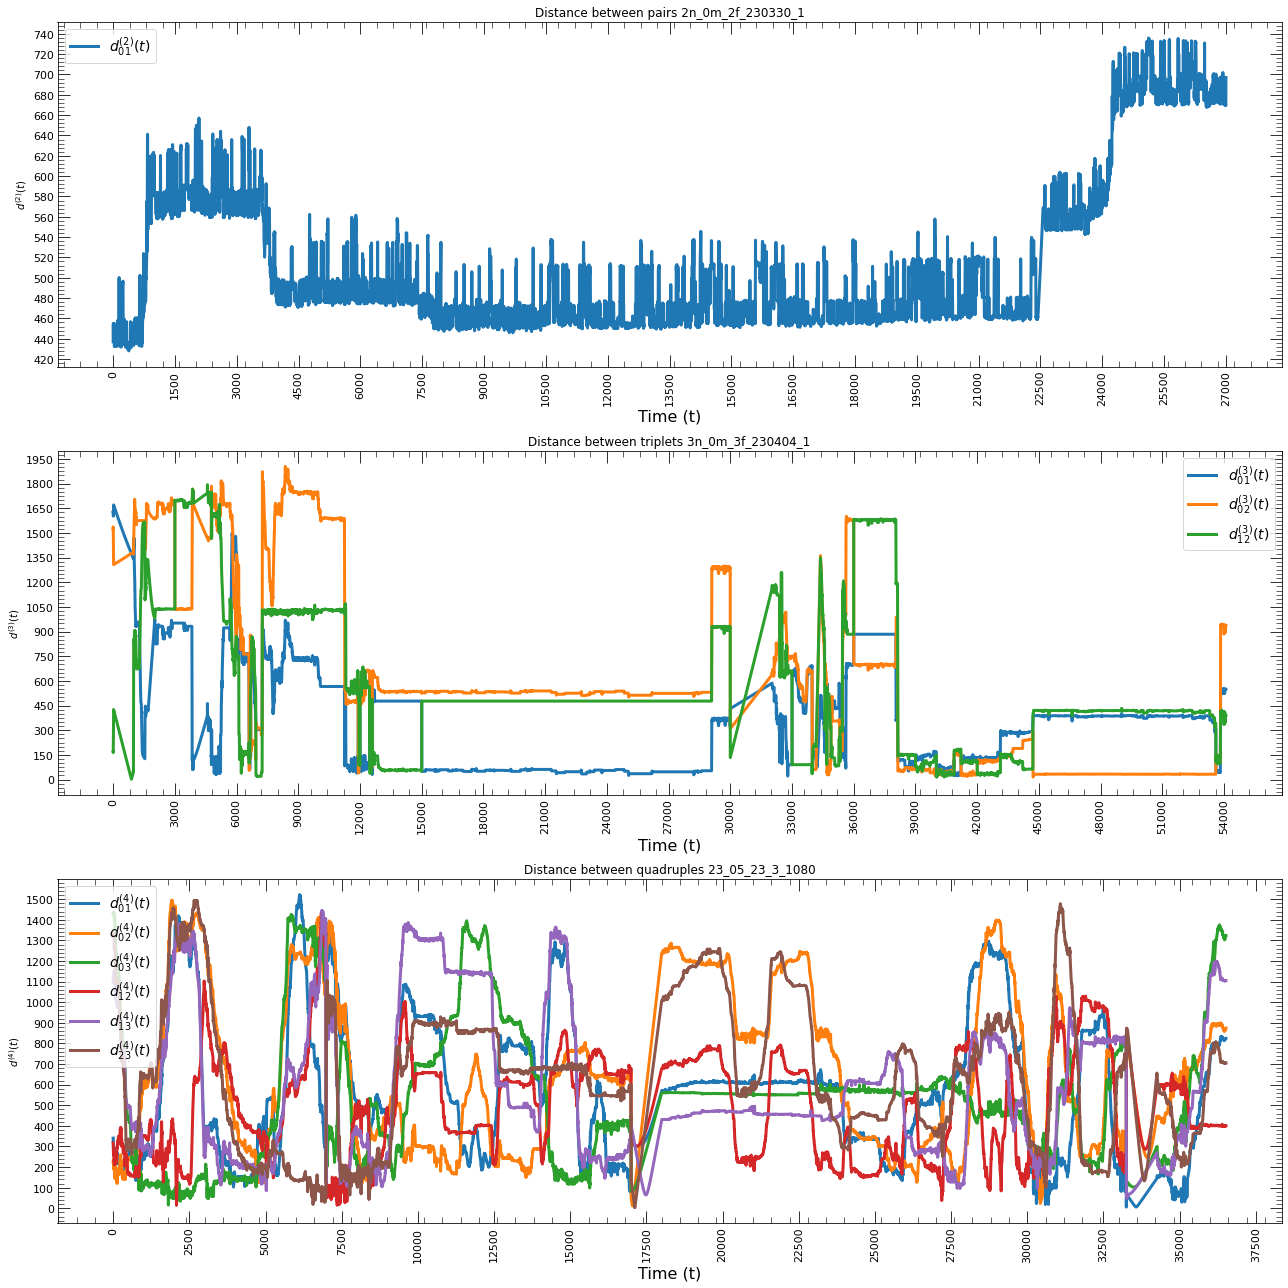

In [7]:
n_x_breaks, n_y_breaks = 20, 20
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

# Distances for 2 individuals ----
t_2n = df_distances_2n["time"].unique()
d01_2n = df_distances_2n[((df_distances_2n["id_1"] == 0) & (df_distances_2n["id_2"] == 1))]["distance"].values

# Distances for 3 individuals ----
t_3n = df_distances_3n["time"].unique()
d01_3n = df_distances_3n[((df_distances_3n["id_1"] == 0) & (df_distances_3n["id_2"] == 1))]["distance"].values
d02_3n = df_distances_3n[((df_distances_3n["id_1"] == 0) & (df_distances_3n["id_2"] == 2))]["distance"].values
d12_3n = df_distances_3n[((df_distances_3n["id_1"] == 1) & (df_distances_3n["id_2"] == 2))]["distance"].values

# Distances for 4 individuals ----
t_4n = df_distances_4n["time"].unique()
d01_4n = df_distances_4n[((df_distances_4n["id_1"] == 0) & (df_distances_4n["id_2"] == 1))]["distance"].values
d02_4n = df_distances_4n[((df_distances_4n["id_1"] == 0) & (df_distances_4n["id_2"] == 2))]["distance"].values
d03_4n = df_distances_4n[((df_distances_4n["id_1"] == 0) & (df_distances_4n["id_2"] == 3))]["distance"].values
d12_4n = df_distances_4n[((df_distances_4n["id_1"] == 1) & (df_distances_4n["id_2"] == 2))]["distance"].values
d13_4n = df_distances_4n[((df_distances_4n["id_1"] == 1) & (df_distances_4n["id_2"] == 3))]["distance"].values
d23_4n = df_distances_4n[((df_distances_4n["id_1"] == 2) & (df_distances_4n["id_2"] == 3))]["distance"].values

# Plot for 2 individuals ----
axes[0].plot(t_2n, d01_2n, label="$d_{{01}}^{{(2)}}(t)$", ls="solid", lw=3)
axes[0].set_ylabel("$d^{{(2)}}(t)$")
axes[0].set_xlabel("Time (t)", fontsize=16)
axes[0].set_title("Distance between pairs {}".format(video_2n))

# Plot for 3 individuals ----
axes[1].plot(t_3n, d01_3n, label="$d_{{01}}^{{(3)}}(t)$", ls="solid", lw=3)
axes[1].plot(t_3n, d02_3n, label="$d_{{02}}^{{(3)}}(t)$", ls="solid", lw=3)
axes[1].plot(t_3n, d12_3n, label="$d_{{12}}^{{(3)}}(t)$", ls="solid", lw=3)
axes[1].set_ylabel("$d^{{(3)}}(t)$")
axes[1].set_xlabel("Time (t)", fontsize=16)
axes[1].set_title("Distance between triplets {}".format(video_3n))

# Plot for 4 individuals ----
axes[2].plot(t_4n, d01_4n, label="$d_{{01}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d02_4n, label="$d_{{02}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d03_4n, label="$d_{{03}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d12_4n, label="$d_{{12}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d13_4n, label="$d_{{13}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].plot(t_4n, d23_4n, label="$d_{{23}}^{{(4)}}(t)$", ls="solid", lw=3)
axes[2].set_ylabel("$d^{{(4)}}(t)$")
axes[2].set_xlabel("Time (t)", fontsize=16)
axes[2].set_title("Distance between quadruples {}".format(video_4n))

# Other plots settings ----
for j in [0, 1, 2]:
    axes[j].legend(fontsize=14)
    axes[j].tick_params(which = "major", direction = "in", top = True, right = True, labelsize = 11, length = 12)
    axes[j].tick_params(which = "minor", direction = "in", top = True, right = True, labelsize = 11, length = 6)
    axes[j].xaxis.set_major_locator(mtick.MaxNLocator(n_x_breaks))
    axes[j].xaxis.set_minor_locator(mtick.MaxNLocator(4 * n_x_breaks))
    axes[j].yaxis.set_major_locator(mtick.MaxNLocator(n_y_breaks))
    axes[j].yaxis.set_minor_locator(mtick.MaxNLocator(5 * n_y_breaks))
    axes[j].tick_params(axis = "x", labelrotation = 90)

plt.tight_layout()
plt.show()

In [8]:
tf = 1000
data_oinfo_2n_3n = np.column_stack((
    # Pairs
    d01_2n[t_2n <= tf],
    # Triplets
    d01_3n[t_3n <= tf],
    d02_3n[t_3n <= tf],
    d12_3n[t_3n <= tf]
))

data_oinfo_3n_4n = np.column_stack((
    # Triplets
    d01_3n[t_3n <= tf].tolist(),
    d02_3n[t_3n <= tf].tolist(),
    d12_3n[t_3n <= tf].tolist(),
    # Quadruples
    d01_4n[t_4n <= tf].tolist(),
    d02_4n[t_4n <= tf].tolist(),
    d03_4n[t_4n <= tf].tolist(),
    d12_4n[t_4n <= tf].tolist(),
    d13_4n[t_4n <= tf].tolist(),
    d23_4n[t_4n <= tf].tolist()
))

# Define the model
model_1 = Oinfo(data_oinfo_2n_3n)  # O-information
model_2 = Oinfo(data_oinfo_3n_4n)  # O-information

# Compute hoi for multiplets with a minimum size of 3 and maximum size of 3
# using the Gaussian Copula entropy
hoi_1 = model_1.fit(minsize=3, maxsize=4, method="gc")
hoi_2 = model_2.fit(minsize=3, maxsize=4, method="gc")

# Plot the landscape
# plot_landscape(hoi_1, model=model_1)
# plot_landscape(hoi_2, model=model_2)

# Print the summary table
print("O-information summary")
print(get_nbest_mult(hoi_1, model=model_1))

print("\nO-information summary")
print(get_nbest_mult(hoi_2, model=model_2))

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/2 [00:00<?,       ?it/s]

    Copnorm and demean the data
Get list of multiplets


  0%|          |  0/2 [00:00<?,       ?it/s]

O-information summary
   index  order       hoi     multiplet
0      4      4  1.047470  [0, 1, 2, 3]
1      3      3  0.702810     [1, 2, 3]
2      0      3  0.333146     [0, 1, 2]
3      1      3  0.272202     [0, 1, 3]
4      2      3  0.257554     [0, 2, 3]

O-information summary
   index  order       hoi     multiplet
0    115      4  2.416862  [0, 2, 5, 7]
1    100      4  2.311332  [0, 1, 5, 7]
2    131      4  2.288902  [0, 4, 5, 7]
3    138      4  1.979856  [0, 5, 7, 8]
4    136      4  1.727674  [0, 5, 6, 7]
5     13      3 -0.182076     [0, 3, 4]
6    198      4 -0.228111  [3, 4, 6, 7]
7    195      4 -0.237450  [3, 4, 5, 6]
8    121      4 -0.244814  [0, 3, 4, 6]
9    176      4 -0.248592  [2, 3, 4, 6]


In [9]:
df_distances_2n["id_pair"] = df_distances_2n["id_1"].astype(str) + df_distances_2n["id_2"].astype(str)
df_distances_3n["id_pair"] = df_distances_3n["id_1"].astype(str) + df_distances_3n["id_2"].astype(str)
df_distances_4n["id_pair"] = df_distances_4n["id_1"].astype(str) + df_distances_4n["id_2"].astype(str)


In [10]:
# Compare same N and same Sex proportion
# Moving window -> Hurst exponent 
# Cumulative window
# Visibility graph -> Degree distribution, heterogeneity number, clustering (Topological measures over networks)
#      Characterization of complex networks: Costa
# Distribution of resting time using distance threshold
# Circadian clock of cockroaches

# Estimate mu for jump length (foraging book)
# heterogeneity standard_deviation / mean_degree > 1 for heavy tails

# Visibility Graph

-------------------- Pairs: 01 --------------------
Global Clustering Coefficient: 0.35041
Average Clustering Coefficient:  0.781240
Average Shortest Path Length: 3.33225
Maximum Degree: 90
Mean Degree of the graph: 9.93

-------------------- Triplets: 01 --------------------
Global Clustering Coefficient: 0.99977
Average Clustering Coefficient:  0.995595
Average Shortest Path Length: 1.10573
Maximum Degree: 325
Mean Degree of the graph: 309.66

-------------------- Triplets: 02 --------------------
Global Clustering Coefficient: 0.99902
Average Clustering Coefficient:  0.996029
Average Shortest Path Length: 1.01293
Maximum Degree: 332
Mean Degree of the graph: 328.74

-------------------- Triplets: 12 --------------------
Global Clustering Coefficient: 0.99979
Average Clustering Coefficient:  0.995282
Average Shortest Path Length: 1.06457
Maximum Degree: 330
Mean Degree of the graph: 315.44

-------------------- Quadruples: 01 --------------------
Global Clustering Coefficient: 0.4469

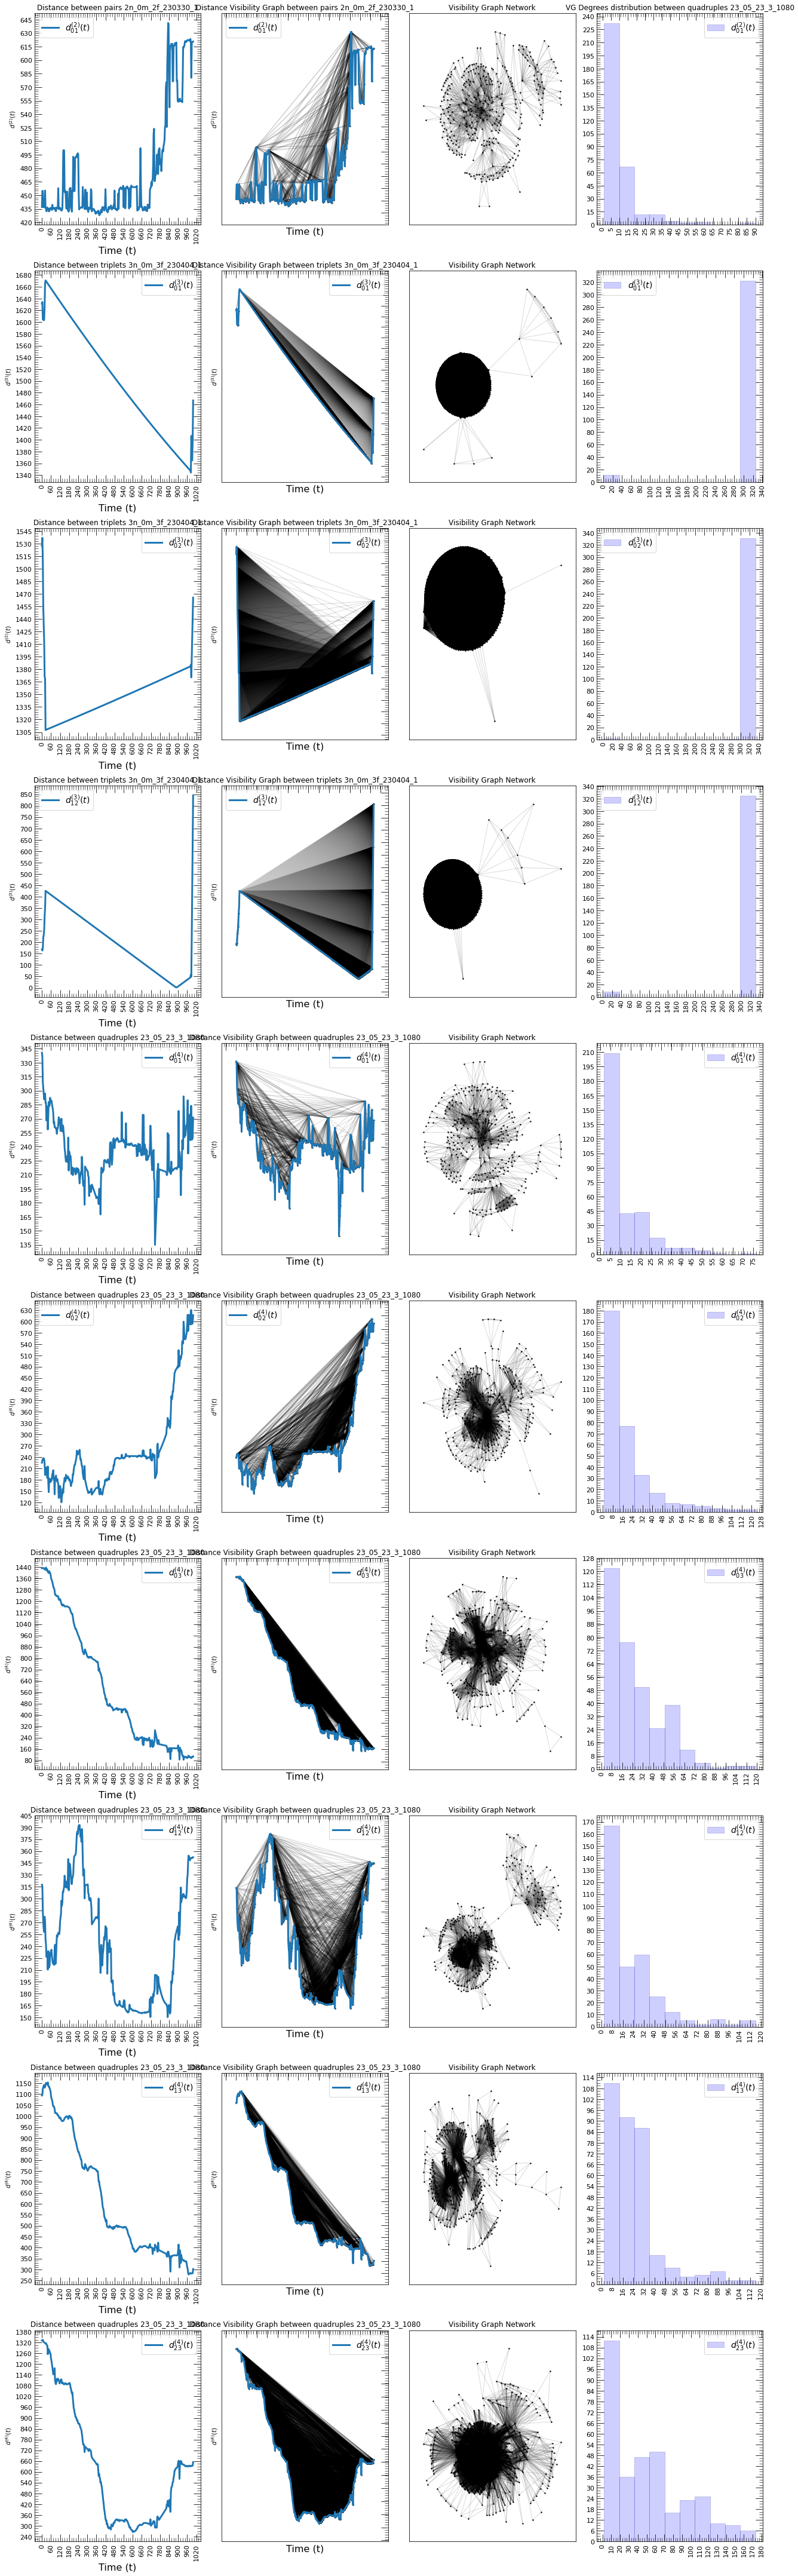

In [46]:
from ts2vg import NaturalVG
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def summary_network(nxg):
    global_clustering = nx.transitivity(nxg)  # 3 #Triangles/#Triads
    avg_clustering = nx.average_clustering(nxg)  # Average clustering coefficient (CLustering of node u is 2#T(u)/deg(u)(deg(u)-1))
    degree_centrality = nx.degree_centrality(nxg)  # The degree centrality for a node v is the fraction of nodes it is connected to.
    avg_path_length = nx.average_shortest_path_length(nxg)  # Betweenness centrality of a node is the sum of the fraction of all-pairs shortest paths that pass through v
    max_degree = max(dict(nxg.degree()).values())
    mean_degree = sum(dict(nxg.degree()).values()) / len(dict(nxg.degree()).values())
    betweenness = nx.betweenness_centrality(nxg)
    print (f"Global Clustering Coefficient: {global_clustering:.5f}")
    print (f"Average Clustering Coefficient: {avg_clustering: 5f}")
    print (f"Average Shortest Path Length: {avg_path_length:.5f}")
    print("Maximum Degree:", max_degree)
    print (f"Mean Degree of the graph: {mean_degree:.2f}")
    print("")
    return dict(nxg.degree()).values()

time_threshold = 1000
n_x_breaks, n_y_breaks = 20, 20
fig, axes = plt.subplots(10, 4, figsize=(18, 60))

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

# 2n --------------------------------------------------------------------------
j = 0
for id_ in df_distances_2n["id_pair"].unique():
    print("-------------------- Pairs: {} --------------------".format(id_))
    # Visibility graph for 2 individuals ----
    mask = ((df_distances_2n["id_pair"] == id_) & (df_distances_2n["time"] <= time_threshold))
    t_2n = df_distances_2n[mask]["time"].values
    d_2n = df_distances_2n[mask]["distance"].values
    g = NaturalVG(directed=None).build(d_2n)
    nxg = g.as_networkx()
    degrees = summary_network(nxg)

    # Plot for 2 individuals ----
    axes[j, 0].plot(t_2n, d_2n, label="$d_{{{}}}^{{(2)}}(t)$".format(id_), ls="solid", lw=3)

    nx.draw_networkx(nxg, ax=axes[j, 1], pos=g.node_positions(), **graph_plot_options)
    axes[j, 1].plot(d_2n, label="$d_{{{}}}^{{(2)}}(t)$".format(id_), ls="solid", lw=3)

    nx.draw_networkx(nxg, ax=axes[j, 2], pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)

    axes[j, 3].hist(degrees, label="$d_{{{}}}^{{(2)}}(t)$".format(id_), alpha = 0.19, facecolor = "blue", edgecolor = "darkblue")
    j+=1

# 3n --------------------------------------------------------------------------
for id_ in df_distances_3n["id_pair"].unique():
    print("-------------------- Triplets: {} --------------------".format(id_))
    # Visibility graph for 3 individuals ----
    mask = ((df_distances_3n["id_pair"] == id_) & (df_distances_3n["time"] <= time_threshold))
    t_3n = df_distances_3n[mask]["time"].values
    d_3n = df_distances_3n[mask]["distance"].values
    g = NaturalVG(directed=None).build(d_3n)
    nxg = g.as_networkx()
    degrees = summary_network(nxg)

    # Plot for 3 individuals ----
    axes[j, 0].plot(t_3n, d_3n, label="$d_{{{}}}^{{(3)}}(t)$".format(id_), ls="solid", lw=3)

    nx.draw_networkx(nxg, ax=axes[j, 1], pos=g.node_positions(), **graph_plot_options)
    axes[j, 1].plot(d_3n, label="$d_{{{}}}^{{(3)}}(t)$".format(id_), ls="solid", lw=3)

    nx.draw_networkx(nxg, ax=axes[j, 2], pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)
    
    axes[j, 3].hist(degrees, label="$d_{{{}}}^{{(3)}}(t)$".format(id_), alpha = 0.19, facecolor = "blue", edgecolor = "darkblue")
    j+=1

# 4n --------------------------------------------------------------------------
for id_ in df_distances_4n["id_pair"].unique():
    print("-------------------- Quadruples: {} --------------------".format(id_))
    # Visibility graph for 4 individuals ----
    mask = ((df_distances_4n["id_pair"] == id_) & (df_distances_4n["time"] <= time_threshold))
    t_4n = df_distances_4n[mask]["time"].values
    d_4n = df_distances_4n[mask]["distance"].values
    g = NaturalVG(directed=None).build(d_4n)
    nxg = g.as_networkx()
    degrees = summary_network(nxg)

    # Plot for 4 individuals ----
    axes[j, 0].plot(t_4n, d_4n, label="$d_{{{}}}^{{(4)}}(t)$".format(id_), ls="solid", lw=3)

    nx.draw_networkx(nxg, ax=axes[j, 1], pos=g.node_positions(), **graph_plot_options)
    axes[j, 1].plot(d_4n, label="$d_{{{}}}^{{(4)}}(t)$".format(id_), ls="solid", lw=3)

    nx.draw_networkx(nxg, ax=axes[j, 2], pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)

    axes[j, 3].hist(degrees, label="$d_{{{}}}^{{(4)}}(t)$".format(id_), alpha = 0.19, facecolor = "blue", edgecolor = "darkblue")
    j+=1

# Plot for 2 individuals ----
axes[0, 0].set_ylabel("$d^{{(2)}}(t)$")
axes[0, 0].set_xlabel("Time (t)", fontsize=16)
axes[0, 0].set_title("Distance between pairs {}".format(video_2n))
axes[0, 1].set_ylabel("$d^{{(2)}}(t)$")
axes[0, 1].set_xlabel("Time (t)", fontsize=16)
axes[0, 1].set_title("Distance Visibility Graph between pairs {}".format(video_2n))
axes[0, 2].set_title("Visibility Graph Network")
axes[0, 3].set_title("VG Degrees distribution between pairs {}".format(video_2n))

# Plot for 3 individuals ----
for j in [1, 2, 3]:
    axes[j, 0].set_ylabel("$d^{{(3)}}(t)$")
    axes[j, 0].set_xlabel("Time (t)", fontsize=16)
    axes[j, 0].set_title("Distance between triplets {}".format(video_3n))
    axes[j, 1].set_ylabel("$d^{{(3)}}(t)$")
    axes[j, 1].set_xlabel("Time (t)", fontsize=16)
    axes[j, 1].set_title("Distance Visibility Graph between triplets {}".format(video_3n))
    axes[j, 2].set_title("Visibility Graph Network")
    axes[0, 3].set_title("VG Degrees distribution between triplets {}".format(video_3n))

# Plot for 4 individuals ----
for j in [4, 5, 6, 7, 8, 9]:
    axes[j, 0].set_ylabel("$d^{{(4)}}(t)$")
    axes[j, 0].set_xlabel("Time (t)", fontsize=16)
    axes[j, 0].set_title("Distance between quadruples {}".format(video_4n))
    axes[j, 1].set_ylabel("$d^{{(4)}}(t)$")
    axes[j, 1].set_xlabel("Time (t)", fontsize=16)
    axes[j, 1].set_title("Distance Visibility Graph between quadruples {}".format(video_4n))
    axes[j, 2].set_title("Visibility Graph Network")
    axes[0, 3].set_title("VG Degrees distribution between quadruples {}".format(video_4n))

# Other plots settings ----
for i in np.arange(10):
    for j in [0, 1, 3]:
        axes[i, j].legend(fontsize=14)
        axes[i, j].tick_params(which="major", direction="in", top=True, right=True, labelsize=11, length=12)
        axes[i, j].tick_params(which="minor", direction="in", top=True, right=True, labelsize=11, length=6)
        axes[i, j].xaxis.set_major_locator(mtick.MaxNLocator(n_x_breaks))
        axes[i, j].xaxis.set_minor_locator(mtick.MaxNLocator(4 * n_x_breaks))
        axes[i, j].yaxis.set_major_locator(mtick.MaxNLocator(n_y_breaks))
        axes[i, j].yaxis.set_minor_locator(mtick.MaxNLocator(5 * n_y_breaks))
        axes[i, j].tick_params(axis = "x", labelrotation = 90)

plt.tight_layout()
plt.show()

# Hurst exponent

In [47]:
from MFDFA import MFDFA

# Estime Hurst exponent using Multifractal Detrended Fluctuation Analysis method ----
def estimate_hurst_mfdfa(
    y_data,
    start,
    end,
    points,
    q_orders,
    orders,
    log_path="../logs",
    log_filename="log_hurst_global",
    verbose=1
):
    """Hurst exponent using MDFA library
    Estimate Hurst exponent using MFDFA method:
        y_data: Data of time series to estimate Hurst exponent
        start: Start point in base 10 for lags in Multifractal Detrended Fluctuation Analysis (MF-DFA) method
        end: End  point in base 10 for lags in MF-DFA method
        points: Number of points in lags used for MF-DFA method
        q_orders: Exponent orders using in the fluctuation of MF-DFA method
        orders: Degrees of polynomials used to calculate detrended fluctuation analysis (DFA)
        log_path: Logs path
        log_filename: Log filename for output
        verbose: verbose
    """
    
    if isinstance(q_orders, int) == True:
        q_orders = [q_orders]
        
    if isinstance(orders, int) == 1:
        orders = [orders]
    
    try:
        # Select a band of lags from 10**start to 10**end ----
        lag = np.unique(np.logspace(start, end, points).astype(int))
        df_hurst = []
        
        # Select the power q ----
        for q in q_orders:
            # The order of the polynomial fitting (Detendred fluctuation analysis) ----
            for order in orders:
                lag, dfa = MFDFA(y_data, lag = lag, q = q, order = order)

                # And now we need to fit the line to find the slope. Don't
                # forget that since you are plotting in a double logarithmic
                # scales, you need to fit the logs of the results
                H_hat = np.polyfit(np.log(lag)[7:], np.log(dfa[7:]), 1)[0]

                # Final dataframe with regressions ----
                df_local_hurst = pd.DataFrame({
                    "q_order": [q],
                    "dfa_degree": [order],
                    "hurst": H_hat
                })

                # Append to final dataframe ----
                df_hurst.append(df_local_hurst)
                
                # Function development ----
                if verbose >= 1:
                    with open("{}/{}.txt".format(log_path, log_filename), "a") as file:
                        file.write("Estimated Hurst {} for q = {} and dfa_degree = {}\n".format(H_hat[0], q, order))

    except Exception as e:
        df_hurst = []
        
        # Select the power q ----
        for q in q_orders:
            # The order of the polynomial fitting (Detendred fluctuation analysis) ----
            for order in orders:
                # Final dataframe with regressions ----
                df_local_hurst = pd.DataFrame({
                    "q_order": [q],
                    "dfa_degree": [order],
                    "hurst": 0
                })
                
                # Append to final dataframe ----
                df_hurst.append(df_local_hurst)

                # Function development ----
                if verbose >= 1:
                    with open("{}/{}.txt".format(log_path, log_filename), "a") as file:
                        file.write("Non-estimated Hurst for q = {} and dfa_degree = {}\n".format(q, order))
                        file.write("{}\n".format(e))
    
    df_hurst = pd.concat(df_hurst).reset_index()
    del df_hurst["index"]

    return df_hurst


# Estime Hurst exponent over multiple periods ----
def estimate_hurst_mfdfa_df(
    df_data,
    points,
    n_step,
    log_path,
    log_filename,
    verbose,
    arg_list
):
    """Hurst exponent using MDFA library over different symbols
    Estimate Hurst exponent using MFDFA method:
        df_data: Dataframe with multiple symbols
        points: Number of points in lags used for MF-DFA method
        n_step: Number of skipped steps in original data (window size)
        log_path: Logs path
        log_filename: log filename for output
        verbose: verbose
        arg_list[0]: Exponent orders using in the fluctuation of MF-DFA method
        arg_list[1]: Degrees of polynomials used to calculate detrended fluctuation analysis (DFA)
    """
    
    # Definition of arg_list components ----
    q_orders = arg_list[0]
    orders = arg_list[1]
    
    df_hurst = []
    for i in df_data["id_pair"].unique():
        df_aux = df_data[df_data["id_pair"] == i]
        steps = df_aux[((df_aux["time"] % n_step == 0) | (df_aux["time"] == (df_aux.shape[0] - 1)))]["time"].unique()
        for j in steps:
            # Estimate initial and final lags ----
            end = np.log10(df_data[(df_data["id_pair"] == i) & (df_data["time"] <= j)].shape[0]).astype(int)
            start = np.min([0.5, end])
        
            # Hurst exponent from distance data ----
            df_local = estimate_hurst_mfdfa(
                y_data = df_data[(df_data["id_pair"] == i) & (df_data["time"] <= j)]["distance"].values,
                start = start,
                end = end,
                points = points,
                q_orders = q_orders,
                orders = orders,
                log_path = log_path,
                log_filename = log_filename,
                verbose = verbose
            )
            df_local["id_pair"] = str(i)
            df_local["time"] = j

            # Append to final dataframe ----
            df_hurst.append(df_local)

            # Function development ----
            if verbose >= 1:
                with open("{}/{}.txt".format(log_path, log_filename), "a") as file:
                    file.write("Estimated Hurst exponent for  {}, Step {} and length {}\n".format(i, j, np.exp(end)))
                
    df_hurst = pd.concat(df_hurst).reset_index()
    del df_hurst["index"]

    return df_hurst


In [48]:
q_orders = [2]

df_hurst_2n = estimate_hurst_mfdfa_df(
    df_data=df_distances_2n[df_distances_2n["time"] <= 3000],
    points=10,
    n_step=3,
    log_path="../logs",
    log_filename="log_proof_2",
    verbose=1,
    arg_list=(q_orders, 3)
)

df_hurst_3n = estimate_hurst_mfdfa_df(
    df_data=df_distances_3n[df_distances_3n["time"] <= 3000],
    points=10,
    n_step=3,
    log_path="../logs",
    log_filename="log_proof_3",
    verbose=1,
    arg_list=(q_orders, 3)
)

df_hurst_4n = estimate_hurst_mfdfa_df(
    df_data=df_distances_4n[df_distances_4n["time"] <= 3000],
    points=10,
    n_step=3,
    log_path="../logs",
    log_filename="log_proof_4",
    verbose=1,
    arg_list=(q_orders, 3)
)

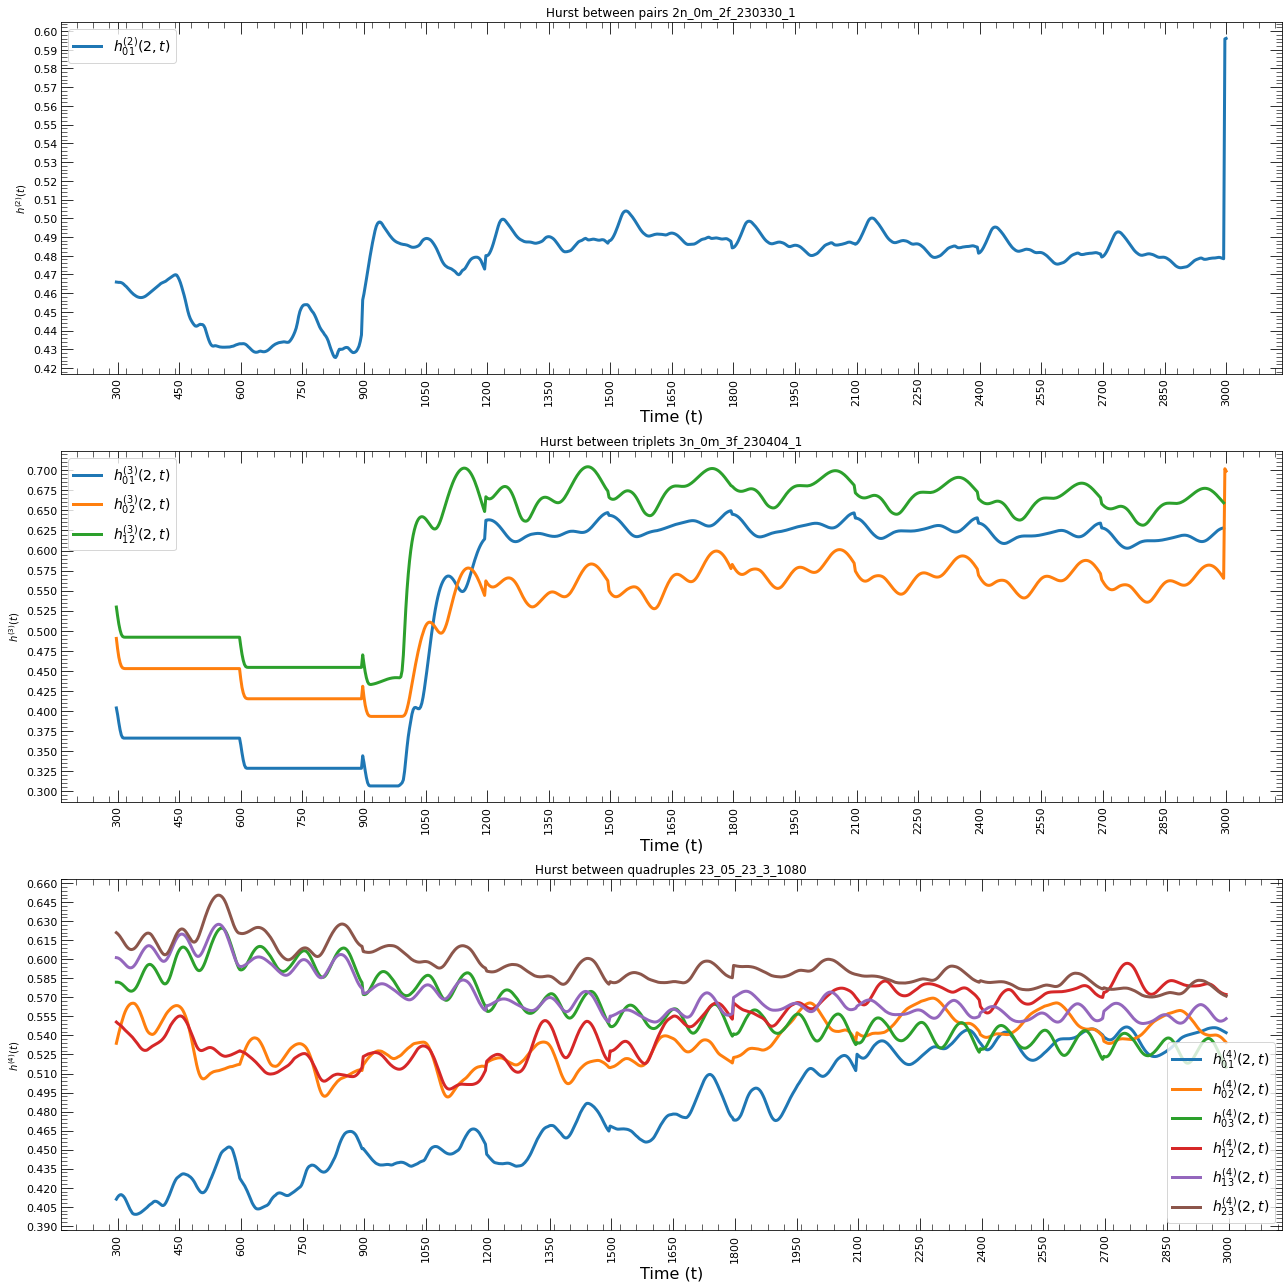

In [50]:
n_x_breaks, n_y_breaks = 20, 20
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

# 2n --------------------------------------------------------------------------
for id_ in df_hurst_2n["id_pair"].unique():
    for q in df_hurst_2n["q_order"].unique():
        # Hurst for 2 individuals ----
        mask = ((df_hurst_2n["id_pair"] == id_) & (df_hurst_2n["q_order"] == q) & (df_hurst_2n["hurst"].between(0, 1, inclusive="right")))
        t_2n = df_hurst_2n[mask]["time"].values
        h_2n = df_hurst_2n[mask]["hurst"].values

        # Plot for 2 individuals ----
        axes[0].plot(t_2n, h_2n, label="$h_{{{}}}^{{(2)}}({},t)$".format(id_, q), ls="solid", lw=3)

# 3n --------------------------------------------------------------------------
for id_ in df_hurst_3n["id_pair"].unique():
    for q in df_hurst_3n["q_order"].unique():
        # Hurst for 3 individuals ----
        mask = ((df_hurst_3n["id_pair"] == id_) & (df_hurst_3n["q_order"] == q) & (df_hurst_3n["hurst"].between(0, 1, inclusive="right")))
        t_3n = df_hurst_3n[mask]["time"].values
        h_3n = df_hurst_3n[mask]["hurst"].values

        # Plot for 3 individuals ----
        axes[1].plot(t_3n, h_3n, label="$h_{{{}}}^{{(3)}}({},t)$".format(id_, q), ls="solid", lw=3)
# 4n --------------------------------------------------------------------------
for id_ in df_hurst_4n["id_pair"].unique():
    for q in df_hurst_4n["q_order"].unique():
        # Hurst for 4 individuals ----
        mask = ((df_hurst_4n["id_pair"] == id_) & (df_hurst_4n["q_order"] == q) & (df_hurst_4n["hurst"].between(0, 1, inclusive="right")))
        t_4n = df_hurst_4n[mask]["time"].values
        h_4n = df_hurst_4n[mask]["hurst"].values

        # Plot for 4 individuals ----
        axes[2].plot(t_4n, h_4n, label="$h_{{{}}}^{{(4)}}({},t)$".format(id_, q), ls="solid", lw=3)

# Plot for 2 individuals ----
axes[0].set_ylabel("$h^{{(2)}}(t)$")
axes[0].set_xlabel("Time (t)", fontsize=16)
axes[0].set_title("Hurst between pairs {}".format(video_2n))

# Plot for 3 individuals ----
axes[1].set_ylabel("$h^{{(3)}}(t)$")
axes[1].set_xlabel("Time (t)", fontsize=16)
axes[1].set_title("Hurst between triplets {}".format(video_3n))

# Plot for 4 individuals ----
axes[2].set_ylabel("$h^{{(4)}}(t)$")
axes[2].set_xlabel("Time (t)", fontsize=16)
axes[2].set_title("Hurst between quadruples {}".format(video_4n))

# Other plots settings ----
for j in [0, 1, 2]:
    axes[j].legend(fontsize=14)
    axes[j].tick_params(which="major", direction="in", top=True, right=True, labelsize=11, length=12)
    axes[j].tick_params(which="minor", direction="in", top=True, right=True, labelsize=11, length=6)
    axes[j].xaxis.set_major_locator(mtick.MaxNLocator(n_x_breaks))
    axes[j].xaxis.set_minor_locator(mtick.MaxNLocator(4 * n_x_breaks))
    axes[j].yaxis.set_major_locator(mtick.MaxNLocator(n_y_breaks))
    axes[j].yaxis.set_minor_locator(mtick.MaxNLocator(5 * n_y_breaks))
    axes[j].tick_params(axis = "x", labelrotation = 90)

plt.tight_layout()
plt.show()